In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from xgboost import XGBClassifier, XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/content/naval_vessel.csv')
df

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = df.drop_duplicates()
df

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
0,1.138,3,289.964,1349.489,6677.380,7.584,7.584,464.006,288,550.563,1.096,0.998,5.947,1.019,7.137,0.082,0.95,0.975
1,2.088,6,6960.180,1376.166,6828.469,28.204,28.204,635.401,288,581.658,1.331,0.998,7.282,1.019,10.655,0.287,0.95,0.975
2,3.144,9,8379.229,1386.757,7111.811,60.358,60.358,606.002,288,587.587,1.389,0.998,7.574,1.020,13.086,0.259,0.95,0.975
3,4.161,12,14724.395,1547.465,7792.630,113.774,113.774,661.471,288,613.851,1.658,0.998,9.007,1.022,18.109,0.358,0.95,0.975
4,5.140,15,21636.432,1924.313,8494.777,175.306,175.306,731.494,288,645.642,2.078,0.998,11.197,1.026,26.373,0.522,0.95,0.975
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11929,5.140,15,21624.934,1924.342,8470.013,175.239,175.239,681.658,288,628.950,2.087,0.998,10.990,1.027,23.803,0.471,1.00,1.000
11930,6.175,18,29763.213,2306.745,8800.352,245.954,245.954,747.405,288,658.853,2.512,0.998,13.109,1.031,32.671,0.647,1.00,1.000
11931,7.148,21,39003.867,2678.052,9120.889,332.389,332.389,796.457,288,680.393,2.982,0.998,15.420,1.036,42.104,0.834,1.00,1.000
11932,8.206,24,50992.579,3087.434,9300.274,438.024,438.024,892.945,288,722.029,3.594,0.998,18.293,1.043,58.064,1.149,1.00,1.000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11934 entries, 0 to 11933
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Lever position                                11934 non-null  float64
 1   Ship speed                                    11934 non-null  int64  
 2   Gas Turbine (GT) shaft torque                 11934 non-null  float64
 3   GT rate of revolutions                        11934 non-null  float64
 4   Gas Generator rate of revolutions             11934 non-null  float64
 5   Starboard Propeller Torque                    11934 non-null  float64
 6   Port Propeller Torque                         11934 non-null  float64
 7   Hight Pressure (HP) Turbine exit temperature  11934 non-null  float64
 8   GT Compressor inlet air temperature           11934 non-null  int64  
 9   GT Compressor outlet air temperature          11934 non-null 

In [7]:
df.describe()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor inlet air temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor inlet air pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
count,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.000000,11934.0,11934.000000,11934.000000,1.193400e+04,11934.000000,11934.000000,11934.000000,11934.000000,11934.00000,11934.0000
mean,5.166667,15.000000,27247.498685,2136.289256,8200.947312,227.335768,227.335768,735.495446,288.0,646.215331,2.352963,9.980000e-01,12.297123,1.029474,33.641261,0.662440,0.97500,0.9875
std,2.626388,7.746291,22148.613155,774.083881,1091.315507,200.495889,200.495889,173.680552,0.0,72.675882,1.084770,2.220539e-16,5.337448,0.010390,25.841363,0.507132,0.01472,0.0075
min,1.138000,3.000000,253.547000,1307.675000,6589.002000,5.304000,5.304000,442.364000,288.0,540.442000,1.093000,9.980000e-01,5.828000,1.019000,0.000000,0.068000,0.95000,0.9750
25%,3.144000,9.000000,8375.883750,1386.758000,7058.324000,60.317000,60.317000,589.872750,288.0,578.092250,1.389000,9.980000e-01,7.447250,1.020000,13.677500,0.246000,0.96200,0.9810
50%,5.140000,15.000000,21630.659000,1924.326000,8482.081500,175.268000,175.268000,706.038000,288.0,637.141500,2.083000,9.980000e-01,11.092000,1.026000,25.276500,0.496000,0.97500,0.9875
75%,7.148000,21.000000,39001.426750,2678.079000,9132.606000,332.364750,332.364750,834.066250,288.0,693.924500,2.981000,9.980000e-01,15.658000,1.036000,44.552500,0.882000,0.98800,0.9940
max,9.300000,27.000000,72784.872000,3560.741000,9797.103000,645.249000,645.249000,1115.797000,288.0,789.094000,4.560000,9.980000e-01,23.140000,1.052000,92.556000,1.832000,1.00000,1.0000


In [8]:
df.isnull().sum()

Lever position                                  0
Ship speed                                      0
Gas Turbine (GT) shaft torque                   0
GT rate of revolutions                          0
Gas Generator rate of revolutions               0
Starboard Propeller Torque                      0
Port Propeller Torque                           0
Hight Pressure (HP) Turbine exit temperature    0
GT Compressor inlet air temperature             0
GT Compressor outlet air temperature            0
HP Turbine exit pressure                        0
GT Compressor inlet air pressure                0
GT Compressor outlet air pressure               0
GT exhaust gas pressure                         0
Turbine Injecton Control                        0
Fuel flow                                       0
GT Compressor decay state coefficient           0
GT Turbine decay state coefficient              0
dtype: int64

In [9]:
df.nunique()

Lever position                                      9
Ship speed                                          9
Gas Turbine (GT) shaft torque                   11430
GT rate of revolutions                           3888
Gas Generator rate of revolutions               11834
Starboard Propeller Torque                       4286
Port Propeller Torque                            4286
Hight Pressure (HP) Turbine exit temperature    11772
GT Compressor inlet air temperature                 1
GT Compressor outlet air temperature            11506
HP Turbine exit pressure                          524
GT Compressor inlet air pressure                    1
GT Compressor outlet air pressure                4209
GT exhaust gas pressure                            19
Turbine Injecton Control                         8496
Fuel flow                                         696
GT Compressor decay state coefficient              51
GT Turbine decay state coefficient                 26
dtype: int64

In [10]:
df = df.drop(columns = ['GT Compressor inlet air pressure', 'GT Compressor inlet air temperature'], axis = 1)

In [11]:
cols = df.columns
print(cols)

Index(['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
       'GT rate of revolutions', 'Gas Generator rate of revolutions',
       'Starboard Propeller Torque', 'Port Propeller Torque',
       'Hight Pressure (HP) Turbine exit temperature',
       'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
       'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
       'Turbine Injecton Control', 'Fuel flow',
       'GT Compressor decay state coefficient',
       'GT Turbine decay state coefficient '],
      dtype='object')


In [12]:
df.corr()

,Lever position,Ship speed,Gas Turbine (GT) shaft torque,GT rate of revolutions,Gas Generator rate of revolutions,Starboard Propeller Torque,Port Propeller Torque,Hight Pressure (HP) Turbine exit temperature,GT Compressor outlet air temperature,HP Turbine exit pressure,GT Compressor outlet air pressure,GT exhaust gas pressure,Turbine Injecton Control,Fuel flow,GT Compressor decay state coefficient,GT Turbine decay state coefficient
Lever position,1.000000e+00,9.999152e-01,0.961025,0.962090,0.986017,0.959241,0.959241,0.961242,0.982748,0.963058,0.969113,0.953361,0.913631,0.931422,2.264405e-15,8.566427e-17
Ship speed,9.999152e-01,1.000000e+00,0.958243,0.960412,0.986621,0.956371,0.956371,0.958841,0.981161,0.960613,0.966975,0.950813,0.910014,0.927815,6.346298e-16,9.367920e-18
Gas Turbine (GT) shaft torque,9.610254e-01,9.582428e-01,1.000000,0.989723,0.932993,0.999177,0.999177,0.991130,0.990227,0.998900,0.997582,0.996046,0.977871,0.995082,2.978258e-03,3.576383e-04
GT rate of revolutions,9.620898e-01,9.604117e-01,0.989723,1.000000,0.943038,0.988625,0.988625,0.979638,0.989278,0.995103,0.996035,0.994019,0.962341,0.980223,1.369908e-03,-1.776556e-05
Gas Generator rate of revolutions,9.860173e-01,9.866210e-01,0.932993,0.943038,1.000000,0.929593,0.929593,0.939762,0.966659,0.937460,0.945938,0.924231,0.879120,0.896959,-1.883800e-02,1.000011e-02
Starboard Propeller Torque,9.592410e-01,9.563708e-01,0.999177,0.988625,0.929593,1.000000,1.000000,0.985962,0.987369,0.998012,0.996172,0.996238,0.977468,0.994366,7.535000e-04,1.044235e-04
Port Propeller Torque,9.592410e-01,9.563708e-01,0.999177,0.988625,0.929593,1.000000,1.000000,0.985962,0.987369,0.998012,0.996172,0.996238,0.977468,0.994366,7.535000e-04,1.044235e-04
Hight Pressure (HP) Turbine exit temperature,9.612418e-01,9.588406e-01,0.991130,0.979638,0.939762,0.985962,0.985962,1.000000,0.992308,0.989383,0.990463,0.980071,0.969655,0.986318,-3.962512e-02,-3.846390e-02
GT Compressor outlet air temperature,9.827476e-01,9.811609e-01,0.990227,0.989278,0.966659,0.987369,0.987369,0.992308,1.000000,0.991704,0.994373,0.983461,0.958711,0.976453,-4.717657e-02,-1.685505e-02
HP Turbine exit pressure,9.630581e-01,9.606126e-01,0.998900,0.995103,0.937460,0.998012,0.998012,0.989383,0.991704,1.000000,0.999401,0.997941,0.975704,0.992728,8.167586e-03,-2.718186e-03


array([[<Axes: title={'center': 'Lever position'}>,
        <Axes: title={'center': 'Ship speed'}>,
        <Axes: title={'center': 'Gas Turbine (GT) shaft torque'}>,
        <Axes: title={'center': 'GT rate of revolutions'}>],
       [<Axes: title={'center': 'Gas Generator rate of revolutions'}>,
        <Axes: title={'center': 'Starboard Propeller Torque'}>,
        <Axes: title={'center': 'Port Propeller Torque'}>,
        <Axes: title={'center': 'Hight Pressure (HP) Turbine exit temperature'}>],
       [<Axes: title={'center': 'GT Compressor outlet air temperature'}>,
        <Axes: title={'center': 'HP Turbine exit pressure'}>,
        <Axes: title={'center': 'GT Compressor outlet air pressure'}>,
        <Axes: title={'center': 'GT exhaust gas pressure'}>],
       [<Axes: title={'center': 'Turbine Injecton Control'}>,
        <Axes: title={'center': 'Fuel flow'}>,
        <Axes: title={'center': 'GT Compressor decay state coefficient'}>,
        <Axes: title={'center': 'GT Turbin

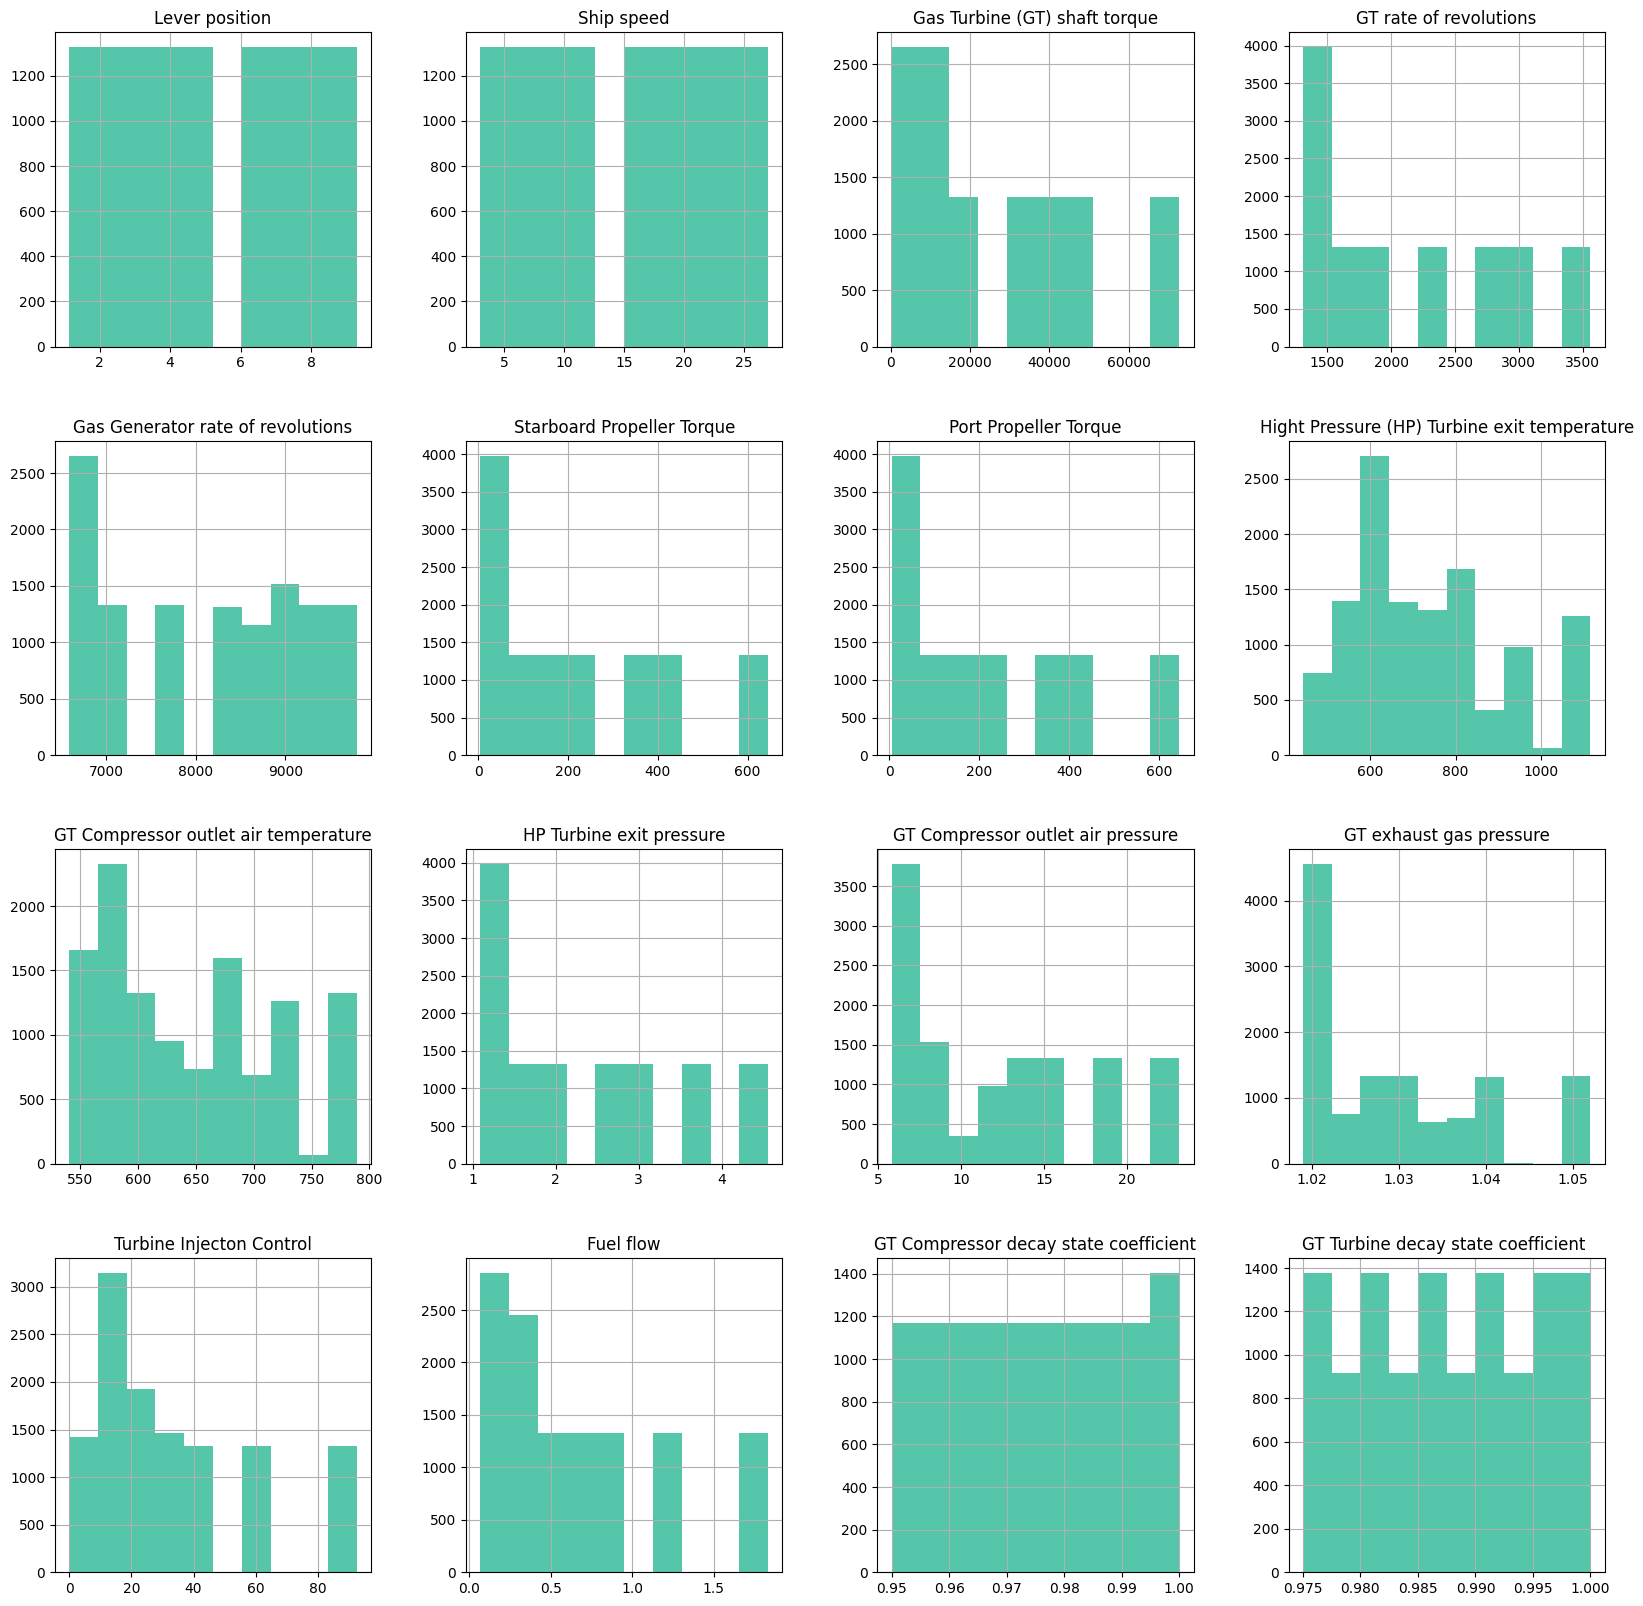

In [13]:
df.hist(figsize = (20,20), color = '#55c6a9')

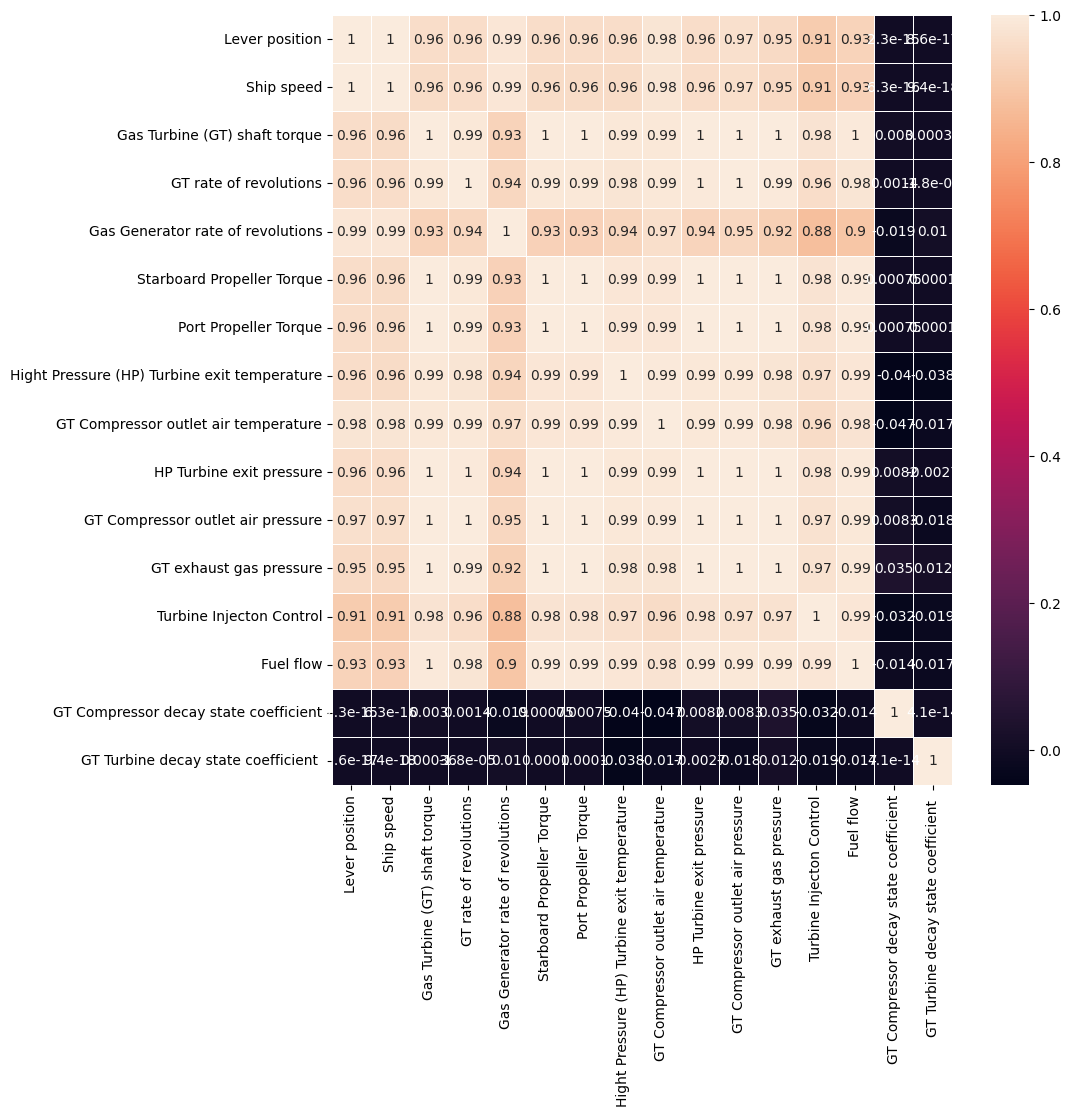

In [14]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot = True,linewidth  = .6)
annot_font_size = 5

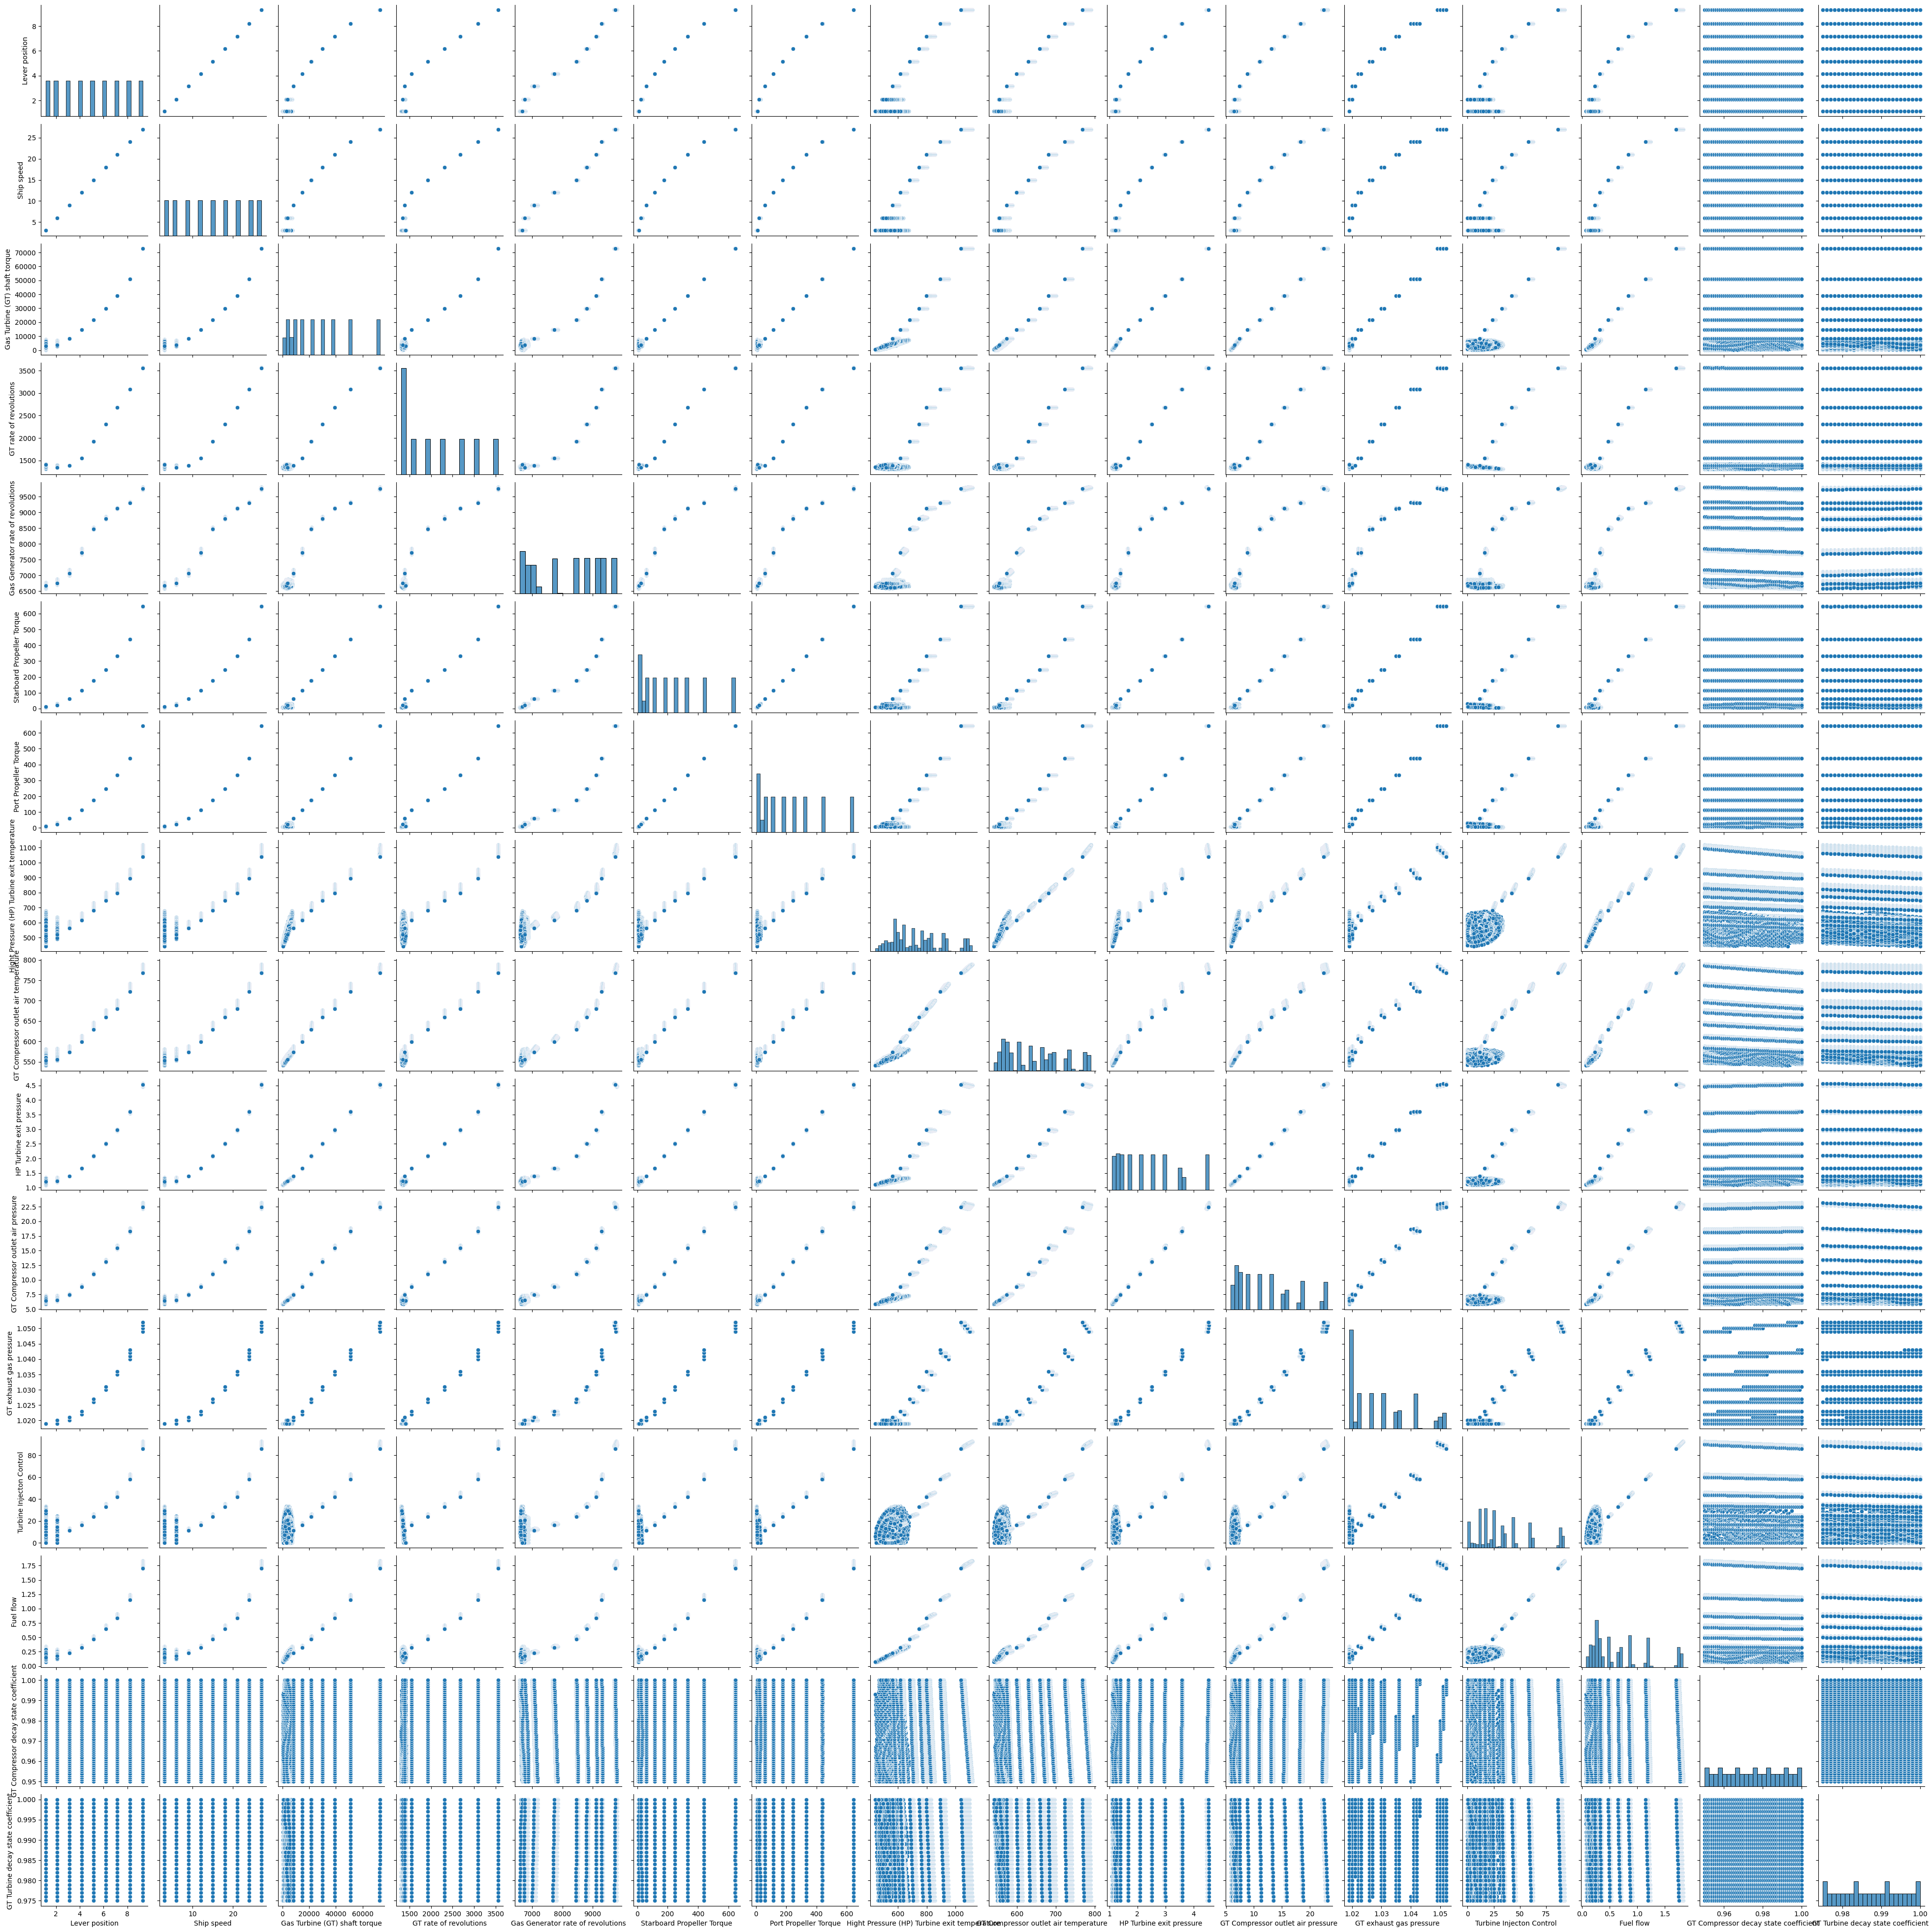

In [15]:
sns.pairplot(df)

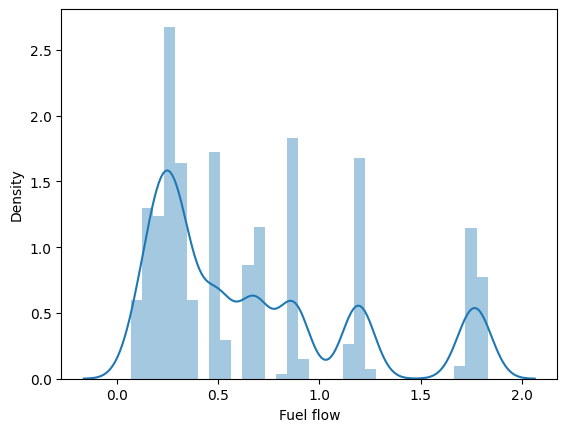

In [16]:
ax = sns.distplot(df['Fuel flow'])

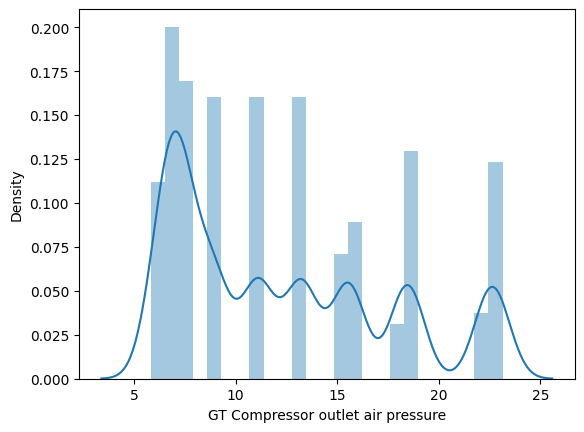

In [17]:
ax = sns.distplot(df['GT Compressor outlet air pressure'])

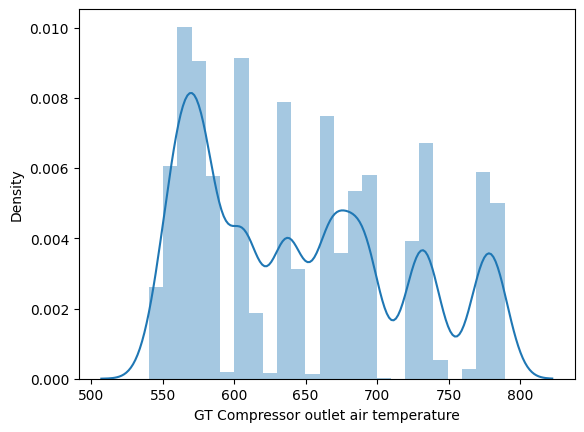

In [18]:
ax = sns.distplot(df['GT Compressor outlet air temperature'])

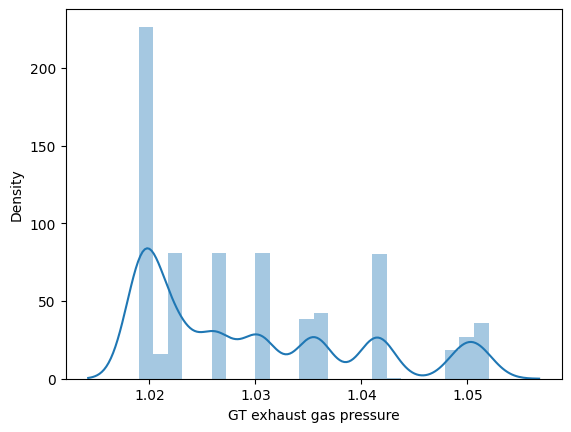

In [16]:
ax = sns.distplot(df['GT exhaust gas pressure'])

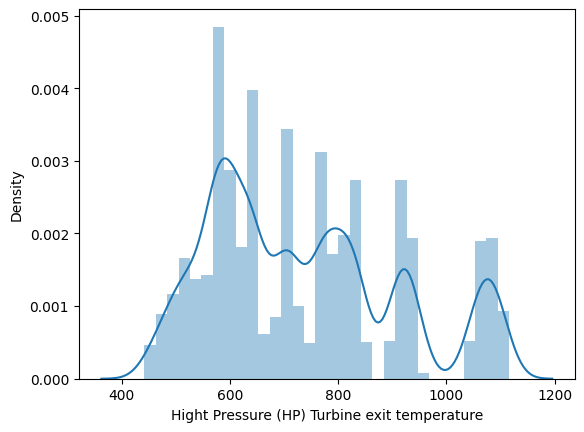

In [17]:
ax = sns.distplot(df['Hight Pressure (HP) Turbine exit temperature'])

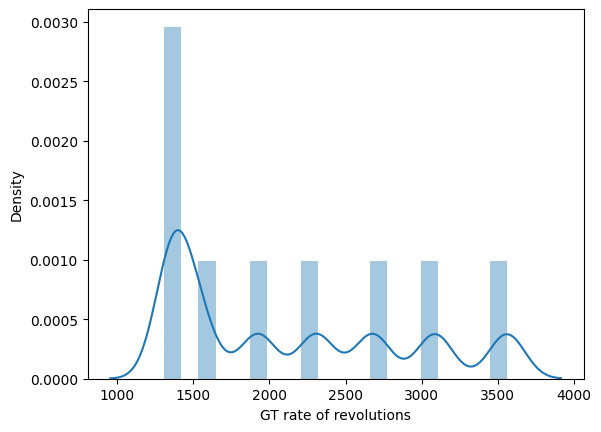

In [18]:
ax = sns.distplot(df['GT rate of revolutions'])

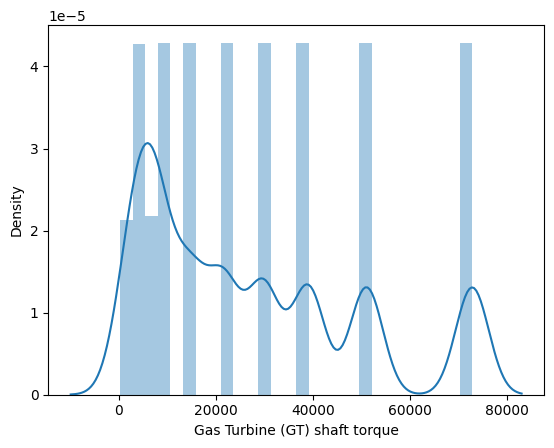

In [19]:
ax = sns.distplot(df['Gas Turbine (GT) shaft torque'])

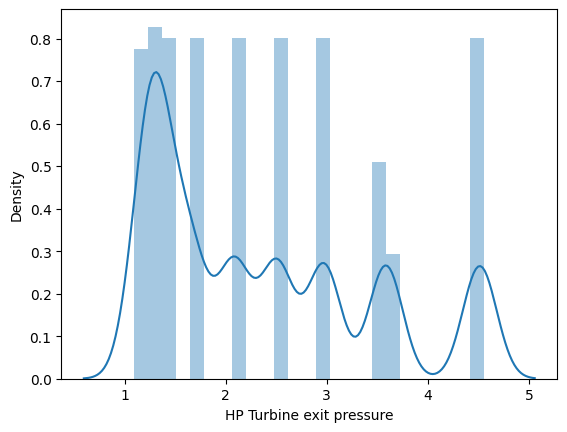

In [20]:
ax = sns.distplot(df['HP Turbine exit pressure'])

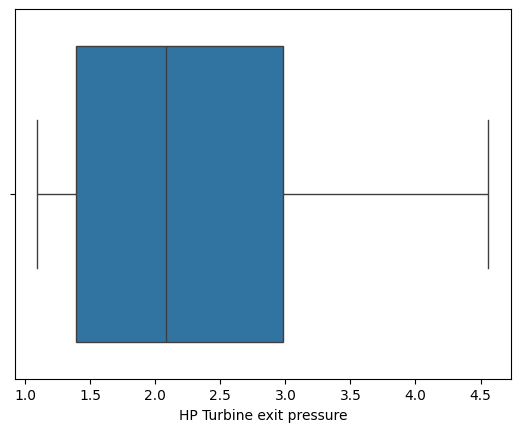

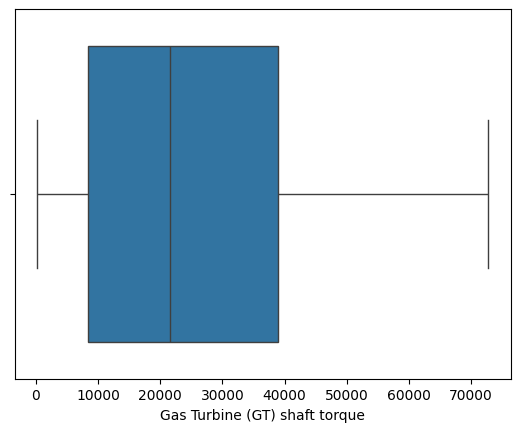

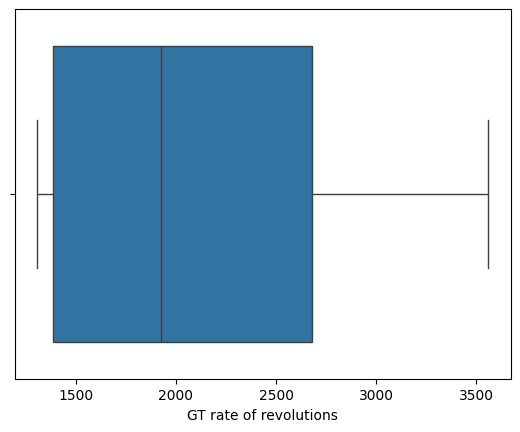

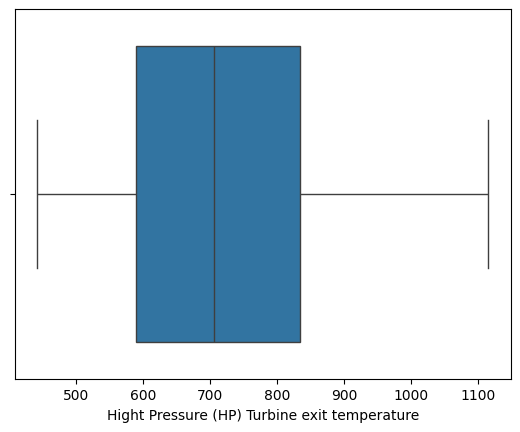

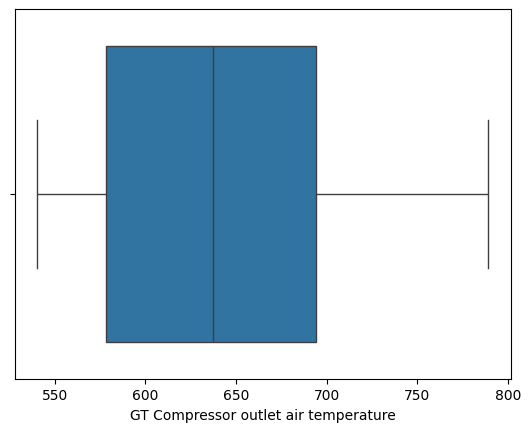

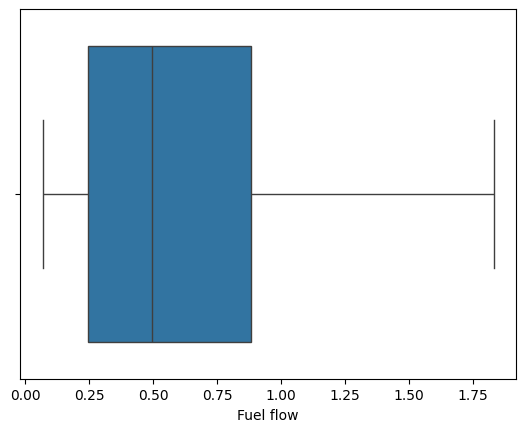

In [28]:
l = ['HP Turbine exit pressure','Gas Turbine (GT) shaft torque','GT rate of revolutions','Hight Pressure (HP) Turbine exit temperature','GT Compressor outlet air temperature','Fuel flow']
for i in l:
  sns.boxplot(x=df[i])
  plt.show()

Text(0, 0.5, 'Fuel flow')

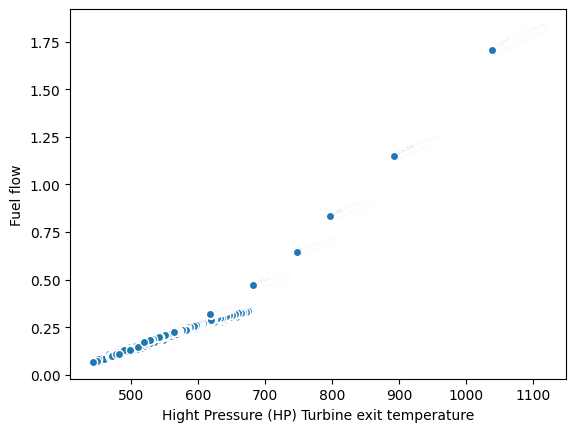

In [19]:
plt.scatter(y='Fuel flow',x='Hight Pressure (HP) Turbine exit temperature',edgecolors='white',data=df)
plt.xlabel('Hight Pressure (HP) Turbine exit temperature')
plt.ylabel('Fuel flow')

In [20]:
column_headings = df.columns
print(df.columns)

Index(['Lever position', 'Ship speed', 'Gas Turbine (GT) shaft torque',
       'GT rate of revolutions', 'Gas Generator rate of revolutions',
       'Starboard Propeller Torque', 'Port Propeller Torque',
       'Hight Pressure (HP) Turbine exit temperature',
       'GT Compressor outlet air temperature', 'HP Turbine exit pressure',
       'GT Compressor outlet air pressure', 'GT exhaust gas pressure',
       'Turbine Injecton Control', 'Fuel flow',
       'GT Compressor decay state coefficient',
       'GT Turbine decay state coefficient '],
      dtype='object')


In [21]:
x=df.drop(['GT Compressor decay state coefficient', 'GT Turbine decay state coefficient '], axis = 1)
y=df['GT Turbine decay state coefficient ']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.35, random_state = 42)

Linear Regression


In [22]:
lr = LinearRegression()
fit = lr.fit(xtrain,ytrain)
print('Mean_Abolute_Error ==', mean_absolute_error(ytest, lr.predict(xtest)))
print('R2 Score ==', r2_score(ytest, lr.predict(xtest)))

Mean_Abolute_Error == 0.0016993712905099578
R2 Score == 0.9089036138610876


#***Ridge Regression***

In [23]:
rd = Ridge(alpha = 0.4)
fit = rd.fit(xtrain,ytrain)
print('Mean_Absolute_Error ==', mean_absolute_error(ytest, rd.predict(xtest)))
print('R2 Score ==', r2_score(ytest, rd.predict(xtest)))

Mean_Absolute_Error == 0.0018881342302327672
R2 Score == 0.8812890494486751


#***Lasso Regression***

In [24]:
ls = Lasso(alpha = 0.4)
fit = ls.fit(xtrain, ytrain)
print('mean_absolute_error ==', mean_absolute_error(ytest, ls.predict(xtest)))
print('R2 Score ==', r2_score(ytest, ls.predict(xtest)))

mean_absolute_error == 0.0065396470331339895
R2 Score == -0.0010933543485434072


#***Random Forest Regressor***

In [25]:
rnd = RandomForestRegressor(ccp_alpha = 0.4)
fit = rnd.fit(xtrain, ytrain)
print('mean_absolute_error ==', mean_absolute_error(ytest, rnd.predict(xtest)))
print('R2 Score ==', r2_score(ytest, rnd.predict(xtest)))

mean_absolute_error == 0.00653930082195934
R2 Score == -0.0009784415647504652


#***K - Nearest Neighbor (KNN)***

In [26]:
knn = KNeighborsRegressor(n_neighbors = 5)
fit = knn.fit(xtrain, ytrain)
print('mean_absolute_error ==', mean_absolute_error(ytest, knn.predict(xtest)))
print('R2 Score ==', r2_score(ytest, knn.predict(xtest)))

mean_absolute_error == 0.0012163753890352055
R2 Score == 0.8643436259466816


#***Support Vector Machine (SVM)***

In [27]:
svr = SVR(kernel = 'linear', C = 1.0)
fit = svr.fit(xtrain, ytrain)
print('mean_absolute_error ==', mean_absolute_error(ytest, svr.predict(xtest)))
print('R2 Score ==', r2_score(ytest, svr.predict(xtest)))

mean_absolute_error == 0.006537826191046213
R2 Score == -0.0004162921743031678
